In [114]:
import requests
from bs4 import BeautifulSoup as bs
import numpy as np
import xarray as xr
import glob
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

In [87]:
# url = "https://n5eil01u.ecs.nsidc.org/SMAP/SPL3SMP.008/"
# page = requests.get(url)
# print(page.text)
soup = bs(page.content,"html.parser")
results = soup.find(id='indexlist')
# print(results.prettify())
dates = results.find_all("td",class_="indexcolname")
# dates_text = dates.find("a")
date_text = []
for date in dates:
    date_text_tmp = date.find("a")
    date_text.append(date_text_tmp.text)
# date_text[0][0]
date_text_filtered = [url + x for x in date_text if x[0] == "2"]

In [93]:
len(date_text_filtered)
date_text_filtered[0]

'https://n5eil01u.ecs.nsidc.org/SMAP/SPL3SMP.008/2015.03.31/'

In [106]:
flat_list = [item for sublist in h5__ for item in sublist]
flat_list = np.asarray(flat_list)
flat_list.shape
np.save('smap_h5.npy',flat_list)

In [107]:
# h5__ = []
# for idx,x in enumerate(date_text_filtered):
#     h5_page = requests.get(x)
#     h5_soup = bs(h5_page.content,"html.parser")
#     h5_results = h5_soup.find(id="indexlist")
#     h5_links = h5_results.find_all("a")
#     h5_href = [y["href"] for y in h5_links]
#     h5_ = [x+z for z in h5_href if z[-1] == "5"]
#     h5_ = list(set(h5_))
#     h5__.append(h5_)
#     if idx % 100 == 0:
#         print(idx)


In [103]:
with open('smap_h5.txt', 'w') as f:
    for item in h5__:
        f.write("%s\n" % item)

In [33]:
date_text_filtered[-1]

'https://n5eil01u.ecs.nsidc.org/SMAP/SPL3SMP.008/2022.03.23/'

In [70]:
h5_page = requests.get(date_text_filtered[0])
h5_soup = BeautifulSoup(h5_page.content,"html.parser")
# print(h5_soup.prettify())
h5_results = h5_soup.find(id='indexlist')
h5_links = h5_results.find_all("a")
h5_href = [x["href"] for x in h5_links]

In [82]:
h5_ = [x for x in h5_href if x[-1] == "5"]

In [84]:
h5_ = list(set(h5_))

In [85]:
h5_

['SMAP_L3_SM_P_20150331_R18290_001.h5', 'SMAP_L3_SM_P_20150331_R18290_002.h5']

In [119]:
flat_list[0][59:]

'SMAP_L3_SM_P_20150331_R18290_002.h5'

In [109]:
flat_list[0]

'https://n5eil01u.ecs.nsidc.org/SMAP/SPL3SMP.008/2015.03.31/SMAP_L3_SM_P_20150331_R18290_002.h5'

In [129]:
import h5py
import sys

In [143]:
f = h5py.File('SMAP_L3_SM_P_20150331_R18290_002.h5','r')
print('By using the command h5py.File() a filehandle is returned:')
print(f); print('\n')

print("Now lets look at the groups within the file to access:")
i=0;
for key in f.keys():
    print(str(i)+ '\t'+key)
    i+=1
    
group_id=list(f.keys())[1];# < Lets focus on the AM overpass for this example
print('\n')
i=0
print("Now lets look at the variables within the filegroup **Soil_Moisture_Retrieval_Data_AM** to access the actual data:")
for var in list(f[group_id].keys()):
    print(str(i)+'\t'+var)
    i+=1

By using the command h5py.File() a filehandle is returned:
<HDF5 file "SMAP_L3_SM_P_20150331_R18290_002.h5" (mode r)>


Now lets look at the groups within the file to access:
0	Metadata
1	Soil_Moisture_Retrieval_Data_AM
2	Soil_Moisture_Retrieval_Data_PM


Now lets look at the variables within the filegroup **Soil_Moisture_Retrieval_Data_AM** to access the actual data:
0	EASE_column_index
1	EASE_row_index
2	albedo
3	albedo_dca
4	albedo_scah
5	albedo_scav
6	boresight_incidence
7	bulk_density
8	clay_fraction
9	freeze_thaw_fraction
10	grid_surface_status
11	landcover_class
12	landcover_class_fraction
13	latitude
14	latitude_centroid
15	longitude
16	longitude_centroid
17	radar_water_body_fraction
18	retrieval_qual_flag
19	retrieval_qual_flag_dca
20	retrieval_qual_flag_scah
21	retrieval_qual_flag_scav
22	roughness_coefficient
23	roughness_coefficient_dca
24	roughness_coefficient_scah
25	roughness_coefficient_scav
26	soil_moisture
27	soil_moisture_dca
28	soil_moisture_error
29	soil_moisture_s

In [144]:
print('the data has a shape of: '+str(f[group_id][list(f[group_id].keys())[0]].shape))

the data has a shape of: (406, 964)


In [146]:
var_id = list(f[group_id].keys())[26] # soil_moisture
sm_data = f[group_id][var_id][:,:]
sm_ds = f[group_id][var_id]
print('data are returned as '+str(type(sm_data)) + ' something easy to work with in python.')

data are returned as <class 'numpy.ndarray'> something easy to work with in python.


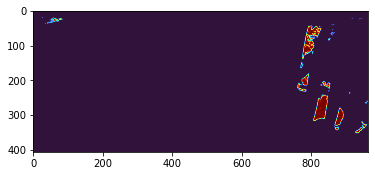

In [149]:
plt.imshow(sm_data,cmap='turbo')